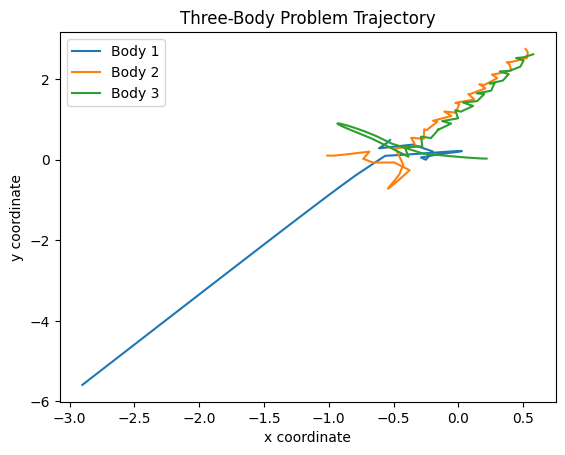

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 1.2  # Gravitational constant

def three_body_equations(t, y):
    x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3 = y

    # Positions
    positions = np.array([[x1, y1], [x2, y2], [x3, y3]])

    # Velocities
    velocities = np.array([[vx1, vy1], [vx2, vy2], [vx3, vy3]])

    # Accelerations
    accelerations = np.zeros_like(positions)

    # Compute gravitational forces
    for i in range(3):
        for j in range(3):
            if i != j:
                r = positions[j] - positions[i]
                r_mag = np.linalg.norm(r)
                r_hat = r / r_mag
                accelerations[i] += G * r_hat / r_mag**2

    derivatives = np.zeros_like(y)
    derivatives[0::4] = velocities[:,0]   # dx/dt
    derivatives[1::4] = velocities[:,1]   # dy/dt
    derivatives[2::4] = accelerations[:,0] # dvx/dt
    derivatives[3::4] = accelerations[:,1] # dvy/dt

    return derivatives

def generate_dataset(num_samples, t_span, t_eval):
    dataset = []
    for _ in range(num_samples):
        # Random initial positions and velocities
        initial_conditions = np.random.randn(12) * 0.5

        # attempt to solve the initial value problem
        sol = solve_ivp(three_body_equations, t_span, initial_conditions, t_eval=t_eval, method='RK45')

        if sol.success:
            dataset.append((initial_conditions, sol.y))
        else:
            continue

    return dataset

num_samples = 50
t_span = (0, 2)
t_eval = np.linspace(0, 2, 50)

# Generate the dataset
dataset = generate_dataset(num_samples, t_span, t_eval)

# Example plot of the first sample
sample = dataset[0]
initial_conditions, trajectory = sample
plt.plot(trajectory[0], trajectory[1], label='Body 1')
plt.plot(trajectory[4], trajectory[5], label='Body 2')
plt.plot(trajectory[8], trajectory[9], label='Body 3')
plt.legend()
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Three-Body Problem Trajectory')
plt.show()

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

def prepare_data(dataset, batch_size=10):
    # Convert dataset to tensors
    inputs = torch.tensor([item[0] for item in dataset], dtype=torch.float32)
    # Use the final state as the label
    labels = torch.tensor([item[1][:, -1] for item in dataset], dtype=torch.float32)  # Here, using the last state

    # Create a TensorDataset

    # Split dataset into training and validation sets using torch.utils.data.random_split to generate train_dataset and val_dataset

    # Create DataLoaders

    return train_loader, val_loader

# Assuming 'dataset' is already loaded
batch_size = 10
train_loader, val_loader = prepare_data(dataset, batch_size=batch_size)

<ipython-input-3-139cefc08b18>:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  inputs = torch.tensor([item[0] for item in dataset], dtype=torch.float32)


In [ ]:
# Build your Neural Network

# create a loss function

In [ ]:
# initialize the model and decide on the number of epochs

for epoch in range(num_epochs):
    # Train the model
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}')

    # Validate the model
    print(f'Validation Loss: {val_loss:.4f}')


Epoch 1, Loss: 55.2261
Validation Loss: 1.9295
Epoch 2, Loss: 55.1305
Validation Loss: 1.9339
Epoch 3, Loss: 54.9961
Validation Loss: 1.9402
Epoch 4, Loss: 54.8803
Validation Loss: 1.9537
Epoch 5, Loss: 54.6909
Validation Loss: 1.9772
Epoch 6, Loss: 54.4819
Validation Loss: 2.0132
Epoch 7, Loss: 54.2563
Validation Loss: 2.0710
Epoch 8, Loss: 53.8367
Validation Loss: 2.1517
Epoch 9, Loss: 53.3090
Validation Loss: 2.2471
Epoch 10, Loss: 52.8671
Validation Loss: 2.4420
Epoch 11, Loss: 52.2907
Validation Loss: 2.6957
Epoch 12, Loss: 51.0183
Validation Loss: 2.8625
Epoch 13, Loss: 50.4200
Validation Loss: 3.2084
Epoch 14, Loss: 48.7612
Validation Loss: 3.5058
Epoch 15, Loss: 47.4853
Validation Loss: 3.7914
Epoch 16, Loss: 45.5025
Validation Loss: 4.1306
Epoch 17, Loss: 42.5530
Validation Loss: 4.5261
Epoch 18, Loss: 40.4421
Validation Loss: 5.6387
Epoch 19, Loss: 38.1006
Validation Loss: 7.3521
Epoch 20, Loss: 32.7822
Validation Loss: 8.2620
Epoch 21, Loss: 30.2453
Validation Loss: 11.9541


In [ ]:
# Make predictions on the next 50 points and plot predicted trajectories